date
2013-12-20    81.441605
2013-12-27    81.223751
Name: median shoreline elevation [m], dtype: float64
81.44160461 81.22375107 0.21785353999999302
date
2014-01-10    87.634491
2014-01-12    85.818478
Name: median shoreline elevation [m], dtype: float64
87.63449097 85.81847763 1.8160133399999978
date
2015-01-06    86.746117
2015-01-08    81.879387
Name: median shoreline elevation [m], dtype: float64
86.74611664 81.8793869 4.866729739999997
date
2016-12-28    85.347073
2017-01-02    83.084015
Name: median shoreline elevation [m], dtype: float64
85.3470726 83.08401489 2.2630577099999982
date
2018-01-16    89.336246
2018-01-21    81.417725
Name: median shoreline elevation [m], dtype: float64
89.33624649 81.41772461 7.91852188
date
2019-01-01    86.941780
2019-01-08    81.002312
Name: median shoreline elevation [m], dtype: float64
86.94178009 81.00231171 5.939468379999994
date
2019-01-19    80.373505
2019-01-24    80.641861
Name: median shoreline elevation [m], dtype: float64
80.37350464

/var/folders/bk/p_xwyf093rg2gtgv183x46qr0000gp/T/ipykernel_70217/2310715797.py:178: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  temp = mpatches.FancyArrowPatch((tide_sub[n], depth_sb_sub[n]),\
/var/folders/bk/p_xwyf093rg2gtgv183x46qr0000gp/T/ipykernel_70217/2310715797.py:185: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  history.append(mpatches.FancyArrowPatch((tide_sub[n], depth_sb_sub[n]),\
/var/folders/bk/p_xwyf093rg2gtgv183x46qr0000gp/T/ipykernel_70217/2310715797.py:178: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  temp = mpatches.FancyArrowPatch((tide_sub[n], depth_sb_sub[n]),\
/var/folders/bk/p_xwyf093rg2gtgv183x46qr0000gp/T/ipykernel_70217/2310715797.py:185: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  history.append(mpatches.FancyArrowPatch((tide_sub[n], depth_sb_sub[n]),\


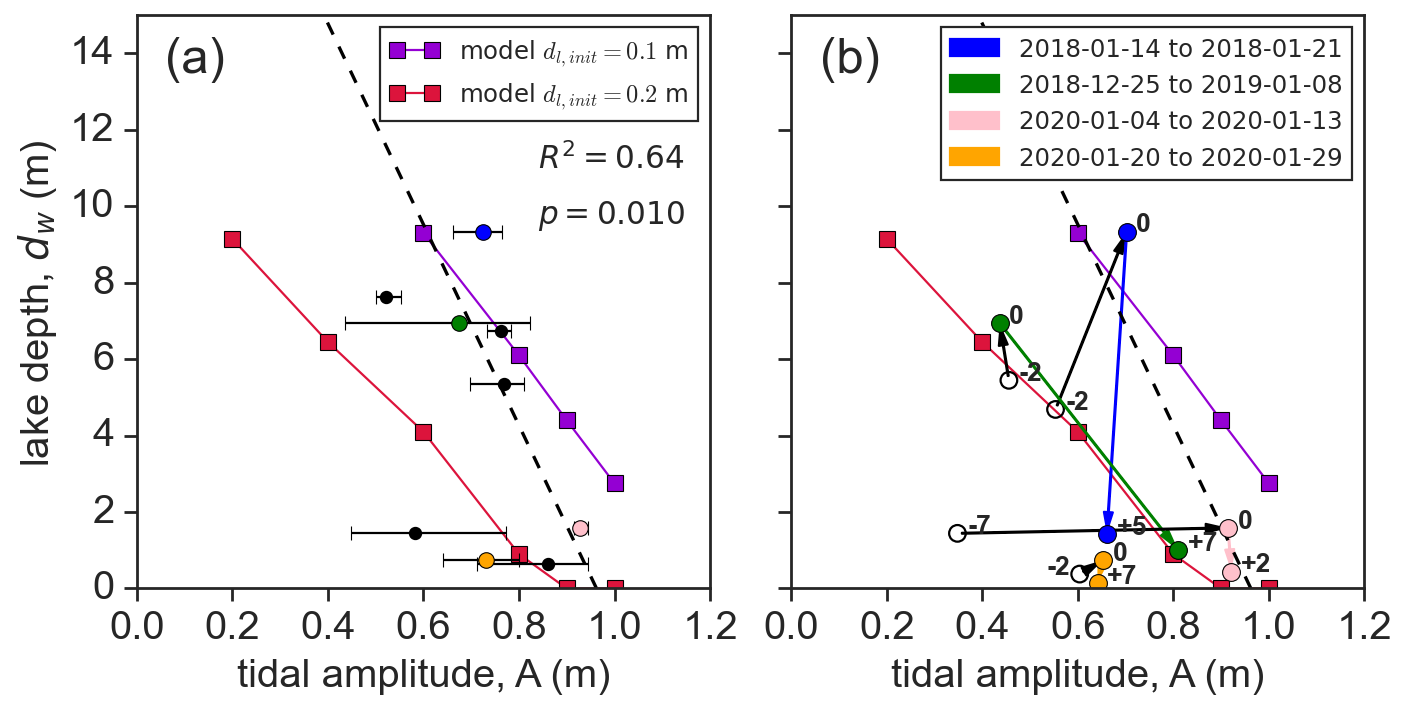

In [ ]:
#================================= read in the observed data =================================
from statsmodels.stats.outliers_influence import summary_table
import matplotlib.patches as patches
# lake volume data
volume_df = pd.read_csv('../amery_data/landsat8_ameryLake_volumes_elevations.csv',\
                        sep =',',index_col='datetime', parse_dates=True)
volume_sb_df = pd.read_csv('../amery_data/landsat8_ameryLake_volumes_elevations_southBasin.csv',\
                           sep =',',index_col='date', parse_dates=True)
# racmo data
racmo_df = pd.read_csv('../amery_data/racmo2.3p2_ameryLake_meltVolume.csv',\
                       parse_dates=['time'], index_col=['time'])
racmo_df = racmo_df/6 # divide by 6 as to plot on same axis as observed lake volumes
# tidal data
tide_df = pd.read_csv('../amery_data/cats2008_ameryLake_tides.csv',\
                      parse_dates=['Time'], index_col=['Time'])
# Make yearly melt plots
years = [2013,2013,2014,2016,2017,2018,2018,2019,2019]
drainage_events = []
drainage_events.append(['2013-12-20', '2013-12-27'])
drainage_events.append(['2014-01-10', '2014-01-12'])
drainage_events.append(['2015-01-06', '2015-01-08'])
drainage_events.append(['2016-12-28', '2017-01-02'])
drainage_events.append(['2018-01-16', '2018-01-21'])
drainage_events.append(['2019-01-01', '2019-01-08'])
drainage_events.append(['2019-01-19', '2019-01-24'])
drainage_events.append(['2020-01-11', '2020-01-13'])
drainage_events.append(['2020-01-22', '2020-01-29'])

drainage_path = []
years_path=[4,5,7,8]
drainage_path.append(['2018-01-14', '2018-01-16', '2018-01-21'])
drainage_path.append(['2018-12-30', '2019-01-01', '2019-01-08'])
drainage_path.append(['2020-01-04', '2020-01-11', '2020-01-13'])
drainage_path.append(['2020-01-20', '2020-01-22', '2020-01-29'])

drainage_day_tag = []
drainage_day_tag.append(['-2', '0', '+5'])
drainage_day_tag.append(['-2', '0', '+7'])
drainage_day_tag.append(['-7', '0', '+2'])
drainage_day_tag.append(['-2', '0', '+7'])
    
# lists to store the data
lake_vol=[]
tide_amplitude=[]
lake_depth_pre_drainage=[]
lake_depth_post_drainage=[]
lake_depth_difference=[]
error = np.zeros((2,9))
var_tidal_amplitude = np.zeros((9))

colorbook = ['blue', 'green', 'pink', 'orange']

for n,year in enumerate(drainage_events):
    # lake vol, depth and tides during drainage
    vol_sub = volume_df[drainage_events[n][0]: drainage_events[n][0]]
    depth_sb_sub = volume_sb_df[drainage_events[n][0]: drainage_events[n][1]]
    tide_sub = tide_df[drainage_events[n][0]: drainage_events[n][1]]
    print(depth_sb_sub['median shoreline elevation [m]'])

    # find the mean value of daily tidal amplitude
    tide_amplitude.append(tide_sub['z_dayrange'].mean()/2.0) # max tidal amplitude
    error[0,n] = tide_sub['z_dayrange'].mean()/2.0 - tide_sub['z_dayrange'].min()/2.0 # error bar
    error[1,n] = tide_sub['z_dayrange'].max()/2.0 - tide_sub['z_dayrange'].mean()/2.0 # error bar
    var_tidal_amplitude[n]=(tide_sub['z_dayrange'].var()/4.0) # variance of tidal amplitude
    
    lake_vol.append(vol_sub['volume [m3]'][drainage_events[n][0]])
    lake_depth_pre_drainage.append(depth_sb_sub['median shoreline elevation [m]'].max() - (basin_elev))
    lake_depth_post_drainage.append(depth_sb_sub['median shoreline elevation [m]'][-1] - (basin_elev))
    lake_depth_difference.append(depth_sb_sub['median shoreline elevation [m]'].max()-\
                                depth_sb_sub['median shoreline elevation [m]'][-1])
    print(depth_sb_sub['median shoreline elevation [m]'][0],\
         depth_sb_sub['median shoreline elevation [m]'][-1],\
          depth_sb_sub['median shoreline elevation [m]'][0]-\
          depth_sb_sub['median shoreline elevation [m]'][-1])

lake_depth_data = np.array(lake_depth_pre_drainage)
tide_array=np.array(tide_amplitude) # tide array
# lake_depth_data = tide_array + 10

# sort_index = np.argsort(lake_depth_data)
# lake_depth_data = np.take_along_axis(lake_depth_data, sort_index, axis=0)
# tide_array = np.take_along_axis(tide_array, sort_index, axis=0)
# var_tidal_amplitude = np.take_along_axis(var_tidal_amplitude, sort_index, axis=0)

# ============================ create a figure =============================
fig,ax = plt.subplots(figsize=(10, 4.5), facecolor='white')
plt.rcParams["figure.dpi"] = 600
plt.style.use('classic')
sns.set_style("ticks")
sns.set_context("notebook", font_scale=0.65)
%config InlineBackend.figure_format = 'retina' # make high res plots for retina 5k displays
# ============================ panel(a) =============================
X0 = lake_depth_data
X0 = sm.add_constant(X0)
mod_wls = sm.WLS(tide_array, X0, weights=1.0/var_tidal_amplitude) # 
res_wls = mod_wls.fit()
x = np.linspace(0,40,20)
y = x*res_wls.params[1]+res_wls.params[0]
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

# st, data, ss2 = summary_table(re, alpha=0.05)
# fittedvalues = data[:, 2]
# predict_mean_se  = data[:, 3]
# predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
# predict_ci_low, predict_ci_upp = data[:, 6:8].T

ax1 = plt.subplot(121)
# model criterion
model_1, = ax1.plot(vtide,np.array(critical_lake_depth_1),linestyle='-',color='darkviolet',linewidth=1,marker='s',\
                  markersize=7, label=r'model $d_{l,init}=0.1$ m', zorder=0)
model_2, = ax1.plot(vtide,np.array(critical_lake_depth_2),linestyle='-',color='crimson',linewidth=1,marker='s',\
                  markersize=7, label=r'model $d_{l,init}=0.2$ m', zorder=0)
# observations
obs = ax1.scatter(tide_array, lake_depth_data, s=25, label='observations',color='black')
reg, = ax1.plot(y,x,linestyle='--',color='black',linewidth=1.5,label='regression')
plt.errorbar(tide_array, np.array(lake_depth_data), linestyle="None",\
             xerr=error,fmt="o",markersize=0, elinewidth=1.0,color='black')

# # add the confidence interval of the slope here
# y0 = 10
# x0 = 0.25
# rect = patches.Rectangle((0,y0),x0,5,linewidth=1,edgecolor='k',facecolor='none')
# ax1.add_patch(rect)
# xx = np.arange(10,20,1)
# reg_high, = plt.plot((xx-y0)*res_wls.conf_int()[1,0]+x0,xx,linestyle='--',color='black',linewidth=1.5,label='regression')
# reg_low, = plt.plot((xx-y0)*res_wls.conf_int()[1,1]+x0,xx,linestyle='--',color='black',linewidth=1.5,label='regression')
# reg, = plt.plot((xx-y0)*res_wls.params[1]+x0,xx,linestyle='-',color='black',linewidth=2.0,label='regression')
# plt.fill_between([0,x0],[-x0/res_wls.conf_int()[1,0]+y0,y0],\
#                  [-x0/res_wls.conf_int()[1,1]+y0,y0],facecolor='grey',alpha=0.5)

print(x)
ax1.set_xlim([0,1.2])
ax1.set_ylim([0,15.0])
ax1.set_xlabel(r'tidal amplitude, A (m)',math_fontfamily='dejavusans',fontsize=fs-6)
ax1.set_ylabel(r'lake depth, $d_w$ (m)',math_fontfamily='dejavusans',fontsize=fs-6)

ax1.plot()
plt.xticks(fontsize=fs-6)
plt.yticks(fontsize=fs-6)

for k,i in enumerate(years_path):
    depth_sb_sub = lake_depth_data[i]
    tide_sub = tide_array[i]
    ax1.plot(tide_sub, depth_sb_sub, marker='o',color=colorbook[k], linewidth=0.0,markersize=7)
    print(tide_sub, depth_sb_sub)
    
plt.tight_layout()
font = font_manager.FontProperties(family='dejavusans',
                                   style='normal', size=fs-13)

lgd = ax1.legend(handles=[model_1,model_2],fontsize=fs-12,loc=1,prop=font)
textstr = r'$R^2=%.2f$' % (res_wls.rsquared)
ax1.text(0.7, 0.78, textstr, transform=ax1.transAxes, fontsize=fs-10,
        verticalalignment='top', bbox=props, math_fontfamily='dejavusans')
textstr = r'$p=%.3f$' % (res_wls.pvalues[-1])
ax1.text(0.7, 0.68, textstr, transform=ax1.transAxes, fontsize=fs-10,
        verticalalignment='top', bbox=props, math_fontfamily='dejavusans')
plt.annotate(r'(a)',xy=(0.05,0.90), xycoords='axes fraction', fontsize=fs-2)
ax1.set_aspect(1./ax1.get_data_ratio())

# ============================ panel(b) =============================
ax2 = plt.subplot(122)
# model criterion
model_1, = ax2.plot(vtide,np.array(critical_lake_depth_1),linestyle='-',color='darkviolet',linewidth=1,marker='s',\
                  markersize=7, label=r'model $d_{l,init}=0.1$ m', zorder=0)
model_2, = ax2.plot(vtide,np.array(critical_lake_depth_2),linestyle='-',color='crimson',linewidth=1,marker='s',\
                  markersize=7, label=r'model $d_{l,init}=0.2$ m', zorder=0)
ax2.plot(y,x,linestyle='--',color='black',linewidth=1.5,label='regression')
style = ArrowStyle('simple', head_length=4.0, head_width=2.0)
labelbook = ['2018-01-14 to 2018-01-21', '2018-12-25 to 2019-01-08', '2020-01-04 to 2020-01-13', '2020-01-20 to 2020-01-29']

history=[]
for i,path in enumerate(drainage_path):
    depth_sb_sub = volume_sb_df['median shoreline elevation [m]'][path]-basin_elev
    tide_sub = tide_df['z_dayrange'][path]/2.0
    for n,depth in enumerate(depth_sb_sub[0:-1]):
        if n==0:
            temp = mpatches.FancyArrowPatch((tide_sub[n], depth_sb_sub[n]),\
                                                  (tide_sub[n+1], depth_sb_sub[n+1]),\
                                                  mutation_scale=2, arrowstyle=style, edgecolor='black',\
                                                    color='black',linewidth=1, label=labelbook[i])
            flag=1
            ax2.add_patch(temp)
        else:
            history.append(mpatches.FancyArrowPatch((tide_sub[n], depth_sb_sub[n]),\
                                                  (tide_sub[n+1], depth_sb_sub[n+1]),\
                                                  mutation_scale=2, arrowstyle=style, edgecolor='black',\
                                                    color=colorbook[i], linewidth=1, label=labelbook[i]))
            ax2.add_patch(history[i])

    ax2.plot(tide_sub[1:], depth_sb_sub[1:], marker='o', markersize=8, color=colorbook[i], linewidth=0.0) # during drainage
    ax2.scatter(tide_sub[0], depth_sb_sub[0], marker='o', facecolors='none', edgecolors='black', s=56 , linewidth=1.0) # pre drainage

    for j,text in enumerate(depth_sb_sub):
        if i!=3:
            text_t = ax2.annotate(drainage_day_tag[i][j], xy=(tide_sub[j], depth_sb_sub[j]),\
                              xytext=(tide_sub[j]+0.02, depth_sb_sub[j]), weight='bold',\
                              fontsize=fs-12, math_fontfamily='dejavusans')
        elif i==3:
            if j!=0:
                text_t = ax2.annotate(drainage_day_tag[i][j], xy=(tide_sub[j], depth_sb_sub[j]),\
                              xytext=(tide_sub[j]+0.02, depth_sb_sub[j]), weight='bold',\
                              fontsize=fs-12, math_fontfamily='dejavusans')
            else:
                text_t = ax2.annotate(drainage_day_tag[i][j], xy=(tide_sub[j], depth_sb_sub[j]),\
                              xytext=(tide_sub[j]-0.07, depth_sb_sub[j]), weight='bold',\
                              fontsize=fs-12, math_fontfamily='dejavusans')
    print(tide_sub, depth_sb_sub)

# # add the confidence interval of the slope here
# y0 = 10
# x0 = 0.25
# rect = patches.Rectangle((0,y0),x0,5,linewidth=1,edgecolor='k',facecolor='none')
# ax2.add_patch(rect)
# xx = np.arange(10,20,1)
# reg_high, = plt.plot((xx-y0)*res_wls.conf_int()[1,0]+x0,xx,linestyle='--',color='black',linewidth=1.5,label='regression')
# reg_low, = plt.plot((xx-y0)*res_wls.conf_int()[1,1]+x0,xx,linestyle='--',color='black',linewidth=1.5,label='regression')
# reg, = plt.plot((xx-y0)*res_wls.params[1]+x0,xx,linestyle='-',color='black',linewidth=2.0,label='regression')
# plt.fill_between([0,x0],[-x0/res_wls.conf_int()[1,0]+y0,y0],\
#                  [-x0/res_wls.conf_int()[1,1]+y0,y0],facecolor='grey',alpha=0.5)

print(x)
ax2.set_xlim([0,1.2])
ax2.set_ylim([0,15.0])
ax2.set_xlabel(r'tidal amplitude, A (m)',math_fontfamily='dejavusans',fontsize=fs-6)
plt.setp(ax2.get_yticklabels(), visible=False)

ax2.plot()
plt.xticks(fontsize=fs-6)
plt.yticks(fontsize=fs-6)
plt.tight_layout()

font = font_manager.FontProperties(family='dejavusans',
                                   style='normal', size=fs-13)

lgd = ax2.legend(handles=[history[0],history[1],history[2],history[3]],fontsize=fs-13,loc=1,prop=font)

ax2.set_aspect(1./ax1.get_data_ratio())
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=-0.2, hspace=-0.2)
plt.annotate(r'(b)',xy=(0.05,0.90), xycoords='axes fraction', fontsize=fs-2)

plt.savefig('../figures/figure_8.jpeg',bbox_inches='tight',dpi=300)
# plt.savefig('../figures/figure_8(high-resolution).tiff',bbox_inches='tight',dpi=600)
